In [239]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"



# Problem: Dataset contains losses of russia equipment / personnel and prisoner of war so we will try to explore daily death & attack through specific weapons.

In [240]:
#Importing dataset

EQ=pd.read_csv("C:/Users/Akshay Yadav/Downloads/archive/russia_losses_equipment.csv")
HU=pd.read_csv("C:/Users/Akshay Yadav/Downloads/archive/russia_losses_personnel.csv")

In [241]:
#Merge both EQ and HU data always. Append-adds a single item to the existing list
df_new=EQ.append(HU)
df_new.head(40)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW
0,2022-02-25,2,10.0,7.0,80.0,516.0,49.0,4.0,100.0,60.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27.0,26.0,146.0,706.0,49.0,4.0,130.0,60.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27.0,26.0,150.0,706.0,50.0,4.0,130.0,60.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29.0,29.0,150.0,816.0,74.0,21.0,291.0,60.0,3.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29.0,29.0,198.0,846.0,77.0,24.0,305.0,60.0,3.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
5,2022-03-02,7,30.0,31.0,211.0,862.0,85.0,40.0,355.0,60.0,3.0,2.0,9.0,NaN,NaN,NaN,NaN,NaN
6,2022-03-03,8,30.0,31.0,217.0,900.0,90.0,42.0,374.0,60.0,3.0,2.0,11.0,NaN,NaN,NaN,NaN,NaN
7,2022-03-04,9,33.0,37.0,251.0,939.0,105.0,50.0,404.0,60.0,3.0,2.0,18.0,NaN,NaN,NaN,NaN,NaN
8,2022-03-05,10,39.0,40.0,269.0,945.0,105.0,50.0,409.0,60.0,3.0,2.0,19.0,NaN,NaN,NaN,NaN,NaN
9,2022-03-06,11,44.0,48.0,285.0,985.0,109.0,50.0,447.0,60.0,4.0,2.0,21.0,NaN,NaN,NaN,NaN,NaN


In [242]:
#Check column names
df_new.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'personnel', 'personnel*', 'POW'],
      dtype='object')

In [243]:
#Provides information regarding dataset.
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 59
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   120 non-null    object 
 1   day                    120 non-null    int64  
 2   aircraft               60 non-null     float64
 3   helicopter             60 non-null     float64
 4   tank                   60 non-null     float64
 5   APC                    60 non-null     float64
 6   field artillery        60 non-null     float64
 7   MRL                    60 non-null     float64
 8   military auto          60 non-null     float64
 9   fuel tank              60 non-null     float64
 10  drone                  60 non-null     float64
 11  naval ship             60 non-null     float64
 12  anti-aircraft warfare  60 non-null     float64
 13  special equipment      41 non-null     float64
 14  mobile SRBM system     31 non-null     float64
 15  personn

In [244]:
#Gives Statistical summary of the dataset.
df_new.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,POW
count,120.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,41.000000,31.000000,60.000000,60.000000
mean,31.500000,109.266667,109.300000,536.350000,1554.466667,252.450000,85.900000,994.916667,68.766667,68.166667,5.150000,44.466667,21.926829,3.935484,15351.933333,382.850000
std,17.390715,51.779476,41.573827,218.997858,455.785612,114.780324,36.629015,446.227702,7.594304,62.072174,2.378042,20.013103,5.605311,0.359211,4972.592394,132.164231
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,2800.000000,0.000000
25%,16.750000,57.750000,83.000000,359.750000,1195.000000,132.500000,61.000000,578.250000,60.000000,7.000000,3.000000,32.500000,19.000000,4.000000,12000.000000,389.000000
50%,31.500000,119.000000,127.000000,578.500000,1652.000000,293.500000,92.000000,1137.500000,73.000000,56.000000,7.000000,51.500000,25.000000,4.000000,16500.000000,416.500000
75%,46.250000,152.500000,137.000000,722.750000,1914.000000,343.250000,108.750000,1384.750000,76.000000,113.750000,7.000000,55.000000,25.000000,4.000000,19350.000000,467.000000
max,61.000000,181.000000,154.000000,884.000000,2258.000000,411.000000,149.000000,1566.000000,76.000000,201.000000,8.000000,69.000000,28.000000,4.000000,21900.000000,489.000000


In [245]:
#Axis=0 means you want to delete complete row, #Axis=1 means you want to delete complete column.
#'inplace=True' if we want to commit the changes to the dataframe. 

df_new.drop(["personnel*"],axis=1,inplace=True)

In [246]:
#To check whether the given column is deleted or not.
df_new.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'personnel', 'POW'],
      dtype='object')

In [259]:
#Sorting values according to ascending order

EQ.sort_values(by='aircraft',ascending=True)
EQ.sum().sort_values().sum()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN
5,2022-03-02,7,30,31,211,862,85,40,355,60,3,2,9,NaN,NaN
6,2022-03-03,8,30,31,217,900,90,42,374,60,3,2,11,NaN,NaN
7,2022-03-04,9,33,37,251,939,105,50,404,60,3,2,18,NaN,NaN
8,2022-03-05,10,39,40,269,945,105,50,409,60,3,2,19,NaN,NaN
9,2022-03-06,11,44,48,285,985,109,50,447,60,4,2,21,NaN,NaN


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [247]:
#Finding out MISSING VALUES
df_new.isnull().sum()

date                      0
day                       0
aircraft                 60
helicopter               60
tank                     60
APC                      60
field artillery          60
MRL                      60
military auto            60
fuel tank                60
drone                    60
naval ship               60
anti-aircraft warfare    60
special equipment        79
mobile SRBM system       89
personnel                60
POW                      60
dtype: int64

In [249]:
#Focus on replacing Missing Values
df_new["mobile SRBM system"].unique()
df_new["special equipment"].unique()
df_new["aircraft"].unique()
df_new["helicopter"].unique()
df_new["tank"].unique()
df_new["APC"].unique()
df_new["field artillery"].unique()
df_new["MRL"].unique()
df_new["military auto"].unique()
df_new["fuel tank"].unique()
df_new["drone"].unique()
df_new["naval ship"].unique()
df_new["anti-aircraft warfare"].unique()
df_new["personnel"].unique()
df_new["POW"].unique()

array([nan,  2.,  4.])

array([nan, 10., 11., 12., 13., 15., 16., 18., 19., 21., 22., 24., 25.,
       26., 27., 28.])

array([ 10.,  27.,  29.,  30.,  33.,  39.,  44.,  46.,  48.,  49.,  57.,
        58.,  74.,  77.,  81.,  84.,  86.,  93.,  95.,  96.,  97.,  99.,
       101., 108., 115., 117., 121., 123., 127., 131., 135., 143., 147.,
       150., 151., 152., 154., 157., 158., 160., 163., 165., 167., 169.,
       171., 172., 176., 177., 179., 181.,  nan])

array([  7.,  26.,  29.,  31.,  37.,  40.,  48.,  68.,  80.,  81.,  83.,
        86.,  90.,  95., 108., 112., 115., 118., 121., 123., 124., 125.,
       127., 129., 131., 134., 135., 136., 137., 140., 143., 144., 145.,
       146., 147., 150., 151., 153., 154.,  nan])

array([ 80., 146., 150., 198., 211., 217., 251., 269., 285., 290., 303.,
       317., 335., 353., 362., 374., 389., 404., 430., 444., 450., 466.,
       476., 498., 509., 517., 530., 561., 575., 582., 586., 597., 605.,
       614., 625., 631., 644., 647., 676., 684., 698., 700., 705., 722.,
       725., 732., 739., 753., 756., 762., 773., 790., 802., 815., 829.,
       838., 854., 873., 884.,  nan])

array([ 516.,  706.,  816.,  846.,  862.,  900.,  939.,  945.,  985.,
        999., 1036., 1070., 1105., 1165., 1205., 1226., 1249., 1279.,
       1375., 1435., 1448., 1470., 1487., 1535., 1556., 1578., 1597.,
       1625., 1640., 1664., 1694., 1710., 1723., 1735., 1751., 1776.,
       1830., 1844., 1858., 1861., 1891., 1895., 1911., 1923., 1946.,
       1964., 1968., 1976., 1982., 2002., 2041., 2063., 2087., 2118.,
       2162., 2205., 2238., 2258.,   nan])

array([ 49.,  50.,  74.,  77.,  85.,  90., 105., 109., 117., 120., 123.,
       125., 135., 140., 150., 190., 201., 205., 213., 230., 240., 252.,
       267., 280., 291., 293., 294., 302., 303., 305., 311., 316., 317.,
       325., 330., 332., 333., 335., 342., 347., 349., 358., 366., 371.,
       376., 381., 386., 391., 393., 397., 403., 408., 411.,  nan])

array([  4.,  21.,  24.,  40.,  42.,  50.,  56.,  58.,  62.,  64.,  70.,
        72.,  74.,  80.,  82.,  90.,  91.,  93.,  95.,  96., 100., 105.,
       107., 108., 111., 115., 122., 125., 127., 130., 132., 136., 138.,
       143., 147., 149.,  nan])

array([ 100.,  130.,  291.,  305.,  355.,  374.,  404.,  409.,  447.,
        454.,  474.,  482.,  526.,  558.,  585.,  600.,  617.,  640.,
        819.,  864.,  879.,  914.,  947.,  969., 1000., 1008., 1033.,
       1089., 1131., 1144., 1150., 1178., 1184., 1201., 1220., 1236.,
       1249., 1273., 1322., 1324., 1358., 1361., 1363., 1384., 1387.,
       1406., 1429., 1437., 1443., 1458., 1471., 1487., 1495., 1504.,
       1508., 1523., 1543., 1557., 1566.,   nan])

array([60., 70., 72., 73., 75., 76., nan])

array([  0.,   2.,   3.,   4.,   7.,   8.,   9.,  11.,  12.,  17.,  21.,
        24.,  35.,  42.,  50.,  53.,  56.,  66.,  71.,  81.,  83.,  85.,
        87.,  89.,  91.,  94.,  96., 111., 112., 119., 124., 132., 134.,
       135., 138., 148., 155., 158., 165., 166., 172., 182., 191., 201.,
        nan])

array([ 2.,  3.,  4.,  5.,  7.,  8., nan])

array([ 0.,  5.,  7.,  9., 11., 18., 19., 21., 23., 27., 28., 29., 31.,
       33., 34., 36., 43., 44., 45., 47., 49., 51., 52., 54., 55., 63.,
       64., 66., 67., 69., nan])

array([   nan,  2800.,  4300.,  4500.,  5300.,  5710.,  5840.,  9000.,
        9166., 10000., 11000., 12000., 13500., 13800., 14000., 14200.,
       14400., 14700., 15000., 15300., 15600., 15800., 16100., 16400.,
       16600., 17000., 17200., 17300., 17500., 17700., 18000., 18300.,
       18500., 18600., 18900., 19000., 19100., 19300., 19500., 19600.,
       19800., 19900., 20000., 20100., 20300., 20600., 20800., 20900.,
       21000., 21200., 21600., 21800., 21900.])

array([ nan,   0., 200., 216., 232., 259., 284., 360., 371., 389., 405.,
       411., 412., 421., 430., 459., 460., 467., 477., 489.])

In [250]:
#Value_counts- to get a Series containing counts of unique values
df_new["mobile SRBM system"].value_counts()
df_new["special equipment"].value_counts()
df_new["aircraft"].value_counts()
df_new["helicopter"].value_counts()
df_new["tank"].value_counts()
df_new["APC"].value_counts()
df_new["field artillery"].value_counts()
df_new["MRL"].value_counts()
df_new["military auto"].value_counts()
df_new["fuel tank"].value_counts()
df_new["drone"].value_counts()
df_new["naval ship"].value_counts()
df_new["anti-aircraft warfare"].value_counts()
df_new["personnel"].value_counts()
df_new["POW"].value_counts()

4.0    30
2.0     1
Name: mobile SRBM system, dtype: int64

25.0    12
27.0     7
21.0     4
24.0     3
10.0     2
11.0     2
15.0     2
28.0     2
12.0     1
13.0     1
16.0     1
18.0     1
19.0     1
22.0     1
26.0     1
Name: special equipment, dtype: int64

150.0    4
143.0    3
163.0    2
29.0     2
30.0     2
27.0     2
49.0     2
158.0    1
131.0    1
135.0    1
147.0    1
151.0    1
152.0    1
154.0    1
157.0    1
10.0     1
160.0    1
123.0    1
165.0    1
167.0    1
169.0    1
171.0    1
172.0    1
176.0    1
177.0    1
179.0    1
127.0    1
117.0    1
121.0    1
115.0    1
33.0     1
39.0     1
44.0     1
46.0     1
48.0     1
57.0     1
58.0     1
74.0     1
77.0     1
81.0     1
84.0     1
86.0     1
93.0     1
95.0     1
96.0     1
97.0     1
99.0     1
101.0    1
108.0    1
181.0    1
Name: aircraft, dtype: int64

134.0    4
154.0    3
131.0    3
135.0    3
127.0    3
108.0    2
137.0    2
29.0     2
124.0    2
81.0     2
83.0     2
26.0     2
144.0    2
31.0     2
150.0    2
136.0    1
151.0    1
140.0    1
143.0    1
153.0    1
146.0    1
147.0    1
145.0    1
7.0      1
129.0    1
125.0    1
121.0    1
118.0    1
115.0    1
112.0    1
95.0     1
90.0     1
86.0     1
80.0     1
68.0     1
48.0     1
40.0     1
37.0     1
123.0    1
Name: helicopter, dtype: int64

150.0    2
80.0     1
725.0    1
605.0    1
614.0    1
625.0    1
631.0    1
644.0    1
647.0    1
676.0    1
684.0    1
698.0    1
700.0    1
705.0    1
722.0    1
732.0    1
586.0    1
739.0    1
753.0    1
756.0    1
762.0    1
773.0    1
790.0    1
802.0    1
815.0    1
829.0    1
838.0    1
854.0    1
873.0    1
597.0    1
582.0    1
146.0    1
575.0    1
198.0    1
211.0    1
217.0    1
251.0    1
269.0    1
285.0    1
290.0    1
303.0    1
317.0    1
335.0    1
353.0    1
362.0    1
374.0    1
389.0    1
404.0    1
430.0    1
444.0    1
450.0    1
466.0    1
476.0    1
498.0    1
509.0    1
517.0    1
530.0    1
561.0    1
884.0    1
Name: tank, dtype: int64

1891.0    2
706.0     2
516.0     1
1923.0    1
1710.0    1
1723.0    1
1735.0    1
1751.0    1
1776.0    1
1830.0    1
1844.0    1
1858.0    1
1861.0    1
1895.0    1
1911.0    1
1946.0    1
1964.0    1
1968.0    1
1976.0    1
1982.0    1
2002.0    1
2041.0    1
2063.0    1
2087.0    1
2118.0    1
2162.0    1
2205.0    1
2238.0    1
1694.0    1
1664.0    1
1640.0    1
1625.0    1
816.0     1
846.0     1
862.0     1
900.0     1
939.0     1
945.0     1
985.0     1
999.0     1
1036.0    1
1070.0    1
1105.0    1
1165.0    1
1205.0    1
1226.0    1
1249.0    1
1279.0    1
1375.0    1
1435.0    1
1448.0    1
1470.0    1
1487.0    1
1535.0    1
1556.0    1
1578.0    1
1597.0    1
2258.0    1
Name: APC, dtype: int64

332.0    3
49.0     2
105.0    2
366.0    2
120.0    2
150.0    2
393.0    1
391.0    1
311.0    1
316.0    1
317.0    1
325.0    1
330.0    1
408.0    1
333.0    1
335.0    1
342.0    1
347.0    1
349.0    1
358.0    1
303.0    1
403.0    1
371.0    1
376.0    1
381.0    1
397.0    1
386.0    1
305.0    1
294.0    1
302.0    1
50.0     1
74.0     1
77.0     1
85.0     1
90.0     1
109.0    1
117.0    1
123.0    1
125.0    1
135.0    1
140.0    1
190.0    1
201.0    1
205.0    1
213.0    1
230.0    1
240.0    1
252.0    1
267.0    1
280.0    1
291.0    1
293.0    1
411.0    1
Name: field artillery, dtype: int64

108.0    4
96.0     4
50.0     4
107.0    3
80.0     3
72.0     3
4.0      3
56.0     3
136.0    2
62.0     2
64.0     2
122.0    2
111.0    2
138.0    1
130.0    1
143.0    1
127.0    1
125.0    1
115.0    1
147.0    1
132.0    1
95.0     1
105.0    1
100.0    1
21.0     1
93.0     1
91.0     1
90.0     1
82.0     1
74.0     1
70.0     1
58.0     1
42.0     1
40.0     1
24.0     1
149.0    1
Name: MRL, dtype: int64

130.0     2
1150.0    1
1178.0    1
1184.0    1
1201.0    1
1220.0    1
1236.0    1
1249.0    1
1273.0    1
1322.0    1
1324.0    1
1358.0    1
1361.0    1
1363.0    1
1384.0    1
100.0     1
1406.0    1
1429.0    1
1437.0    1
1443.0    1
1458.0    1
1471.0    1
1487.0    1
1495.0    1
1504.0    1
1508.0    1
1523.0    1
1543.0    1
1557.0    1
1387.0    1
1144.0    1
1131.0    1
1089.0    1
291.0     1
305.0     1
355.0     1
374.0     1
404.0     1
409.0     1
447.0     1
454.0     1
474.0     1
482.0     1
526.0     1
558.0     1
585.0     1
600.0     1
617.0     1
640.0     1
819.0     1
864.0     1
879.0     1
914.0     1
947.0     1
969.0     1
1000.0    1
1008.0    1
1033.0    1
1566.0    1
Name: military auto, dtype: int64

60.0    25
76.0    25
73.0     4
70.0     2
72.0     2
75.0     2
Name: fuel tank, dtype: int64

7.0      7
3.0      6
112.0    3
2.0      2
11.0     2
56.0     2
0.0      1
135.0    1
111.0    1
119.0    1
124.0    1
132.0    1
134.0    1
148.0    1
138.0    1
94.0     1
155.0    1
158.0    1
165.0    1
166.0    1
172.0    1
182.0    1
191.0    1
96.0     1
87.0     1
91.0     1
35.0     1
4.0      1
8.0      1
9.0      1
12.0     1
17.0     1
21.0     1
24.0     1
42.0     1
89.0     1
50.0     1
53.0     1
66.0     1
71.0     1
81.0     1
83.0     1
85.0     1
201.0    1
Name: drone, dtype: int64

7.0    20
3.0    16
8.0    11
2.0    10
4.0     2
5.0     1
Name: naval ship, dtype: int64

54.0    8
55.0    7
69.0    4
67.0    4
43.0    3
66.0    3
0.0     3
45.0    2
64.0    2
34.0    2
44.0    2
47.0    2
49.0    1
7.0     1
9.0     1
63.0    1
11.0    1
18.0    1
52.0    1
51.0    1
21.0    1
23.0    1
19.0    1
5.0     1
33.0    1
31.0    1
29.0    1
28.0    1
27.0    1
36.0    1
Name: anti-aircraft warfare, dtype: int64

12000.0    7
17700.0    2
11000.0    2
19800.0    1
18000.0    1
18300.0    1
18500.0    1
18600.0    1
18900.0    1
19000.0    1
19100.0    1
19300.0    1
19500.0    1
19600.0    1
2800.0     1
19900.0    1
17500.0    1
20100.0    1
20300.0    1
20600.0    1
20800.0    1
20900.0    1
21000.0    1
21200.0    1
21600.0    1
21800.0    1
20000.0    1
17300.0    1
4300.0     1
17200.0    1
4500.0     1
5300.0     1
5710.0     1
5840.0     1
9000.0     1
9166.0     1
10000.0    1
13500.0    1
13800.0    1
14000.0    1
14200.0    1
14400.0    1
14700.0    1
15000.0    1
15300.0    1
15600.0    1
15800.0    1
16100.0    1
16400.0    1
16600.0    1
17000.0    1
21900.0    1
Name: personnel, dtype: int64

489.0    7
477.0    7
467.0    7
389.0    6
405.0    5
200.0    4
412.0    4
0.0      4
460.0    3
421.0    2
430.0    2
459.0    2
284.0    1
360.0    1
371.0    1
259.0    1
411.0    1
232.0    1
216.0    1
Name: POW, dtype: int64

In [251]:
#Replace the missing values with "Mode"
df_new["mobile SRBM system"]=df_new["mobile SRBM system"].fillna(df_new["mobile SRBM system"].mode()[0])
df_new["special equipment"]=df_new["special equipment"].fillna(df_new["special equipment"].mode()[0])
df_new["aircraft"]=df_new["aircraft"].fillna(df_new["aircraft"].mode()[0])
df_new["helicopter"]=df_new["helicopter"].fillna(df_new["helicopter"].mode()[0])
df_new["tank"]=df_new["tank"].fillna(df_new["tank"].mode()[0])
df_new["APC"]=df_new["APC"].fillna(df_new["APC"].mode()[0])
df_new["field artillery"]=df_new["field artillery"].fillna(df_new["field artillery"].mode()[0])
df_new["MRL"]=df_new["MRL"].fillna(df_new["MRL"].mode()[0])
df_new["military auto"]=df_new["military auto"].fillna(df_new["military auto"].mode()[0])
df_new["fuel tank"]=df_new["fuel tank"].fillna(df_new["fuel tank"].mode()[0])
df_new["drone"]=df_new["drone"].fillna(df_new["drone"].mode()[0])
df_new["naval ship"]=df_new["naval ship"].fillna(df_new["naval ship"].mode()[0])
df_new["anti-aircraft warfare"]=df_new["anti-aircraft warfare"].fillna(df_new["anti-aircraft warfare"].mode()[0])
df_new["personnel"]=df_new["personnel"].fillna(df_new["personnel"].mode()[0])
df_new["POW"]=df_new["POW"].fillna(df_new["POW"].mode()[0])
df_new.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,POW
0,2022-02-25,2,10.0,7.0,80.0,516.0,49.0,4.0,100.0,60.0,0.0,2.0,0.0,25.0,4.0,12000.0,467.0
1,2022-02-26,3,27.0,26.0,146.0,706.0,49.0,4.0,130.0,60.0,2.0,2.0,0.0,25.0,4.0,12000.0,467.0
2,2022-02-27,4,27.0,26.0,150.0,706.0,50.0,4.0,130.0,60.0,2.0,2.0,0.0,25.0,4.0,12000.0,467.0
3,2022-02-28,5,29.0,29.0,150.0,816.0,74.0,21.0,291.0,60.0,3.0,2.0,5.0,25.0,4.0,12000.0,467.0
4,2022-03-01,6,29.0,29.0,198.0,846.0,77.0,24.0,305.0,60.0,3.0,2.0,7.0,25.0,4.0,12000.0,467.0


In [ ]:
#Observation: "0" values shows that replacement is done.

df_new["mobile SRBM system"].isnull().sum()
df_new["special equipment"].isnull().sum()
df_new["special equipment"].isnull().sum()
df_new["aircraft"].isnull().sum()
df_new["helicopter"].isnull().sum()
df_new["tank"].isnull().sum()
df_new["APC"].isnull().sum()
df_new["field artillery"].isnull().sum()
df_new["MRL"].isnull().sum()
df_new["military auto"].isnull().sum()
df_new["fuel tank"].isnull().sum()
df_new["drone"].isnull().sum()
df_new["naval ship"].isnull().sum()
df_new["anti-aircraft warfare"].isnull().sum()
df_new["personnel*"].isnull().sum()
df_new["POW"].isnull().sum()


<Figure size 1440x936 with 0 Axes>

<AxesSubplot:>

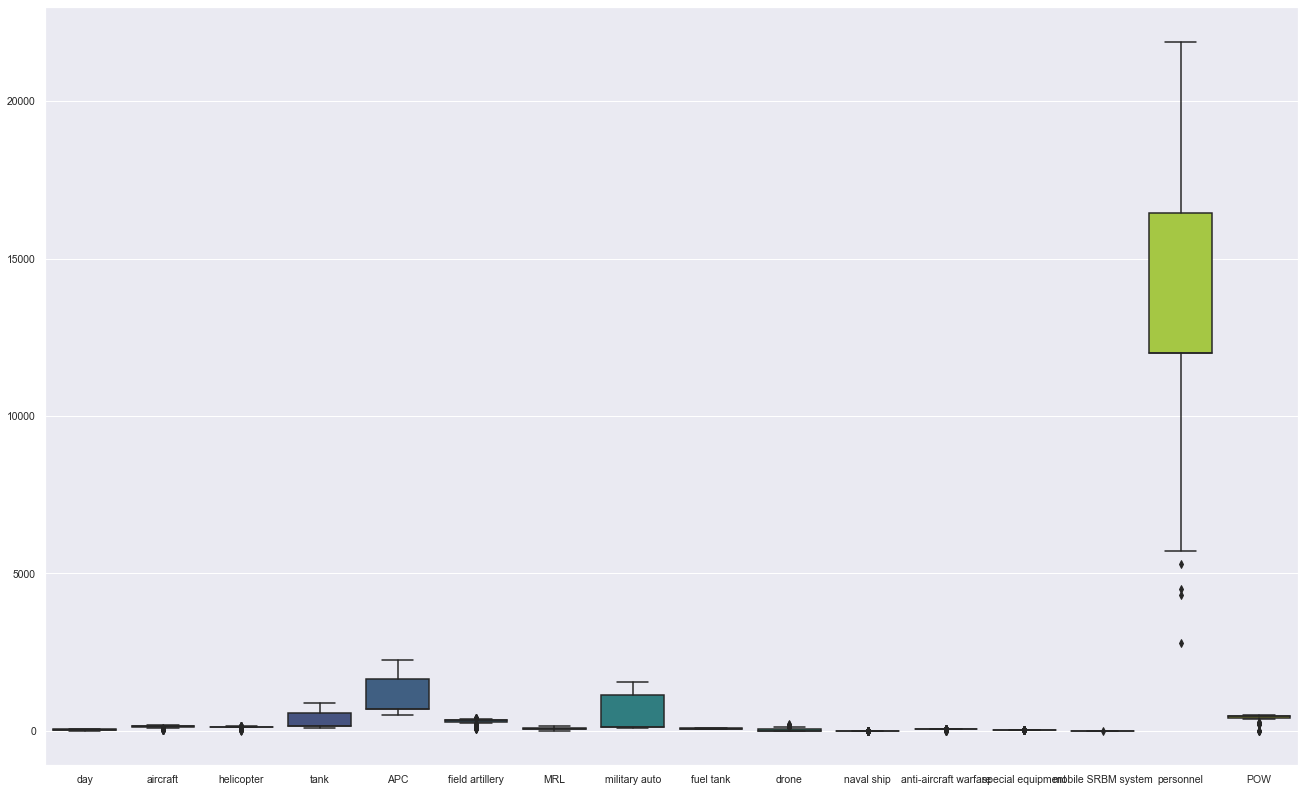

In [252]:
#Plotting Boxplot to see whether there is any outlier.
plt.figure(figsize=(20,13))
sns.set(font_scale = 0.95)
sns.boxplot(data = df_new, palette = 'viridis',)

<Figure size 864x504 with 0 Axes>

<AxesSubplot:>

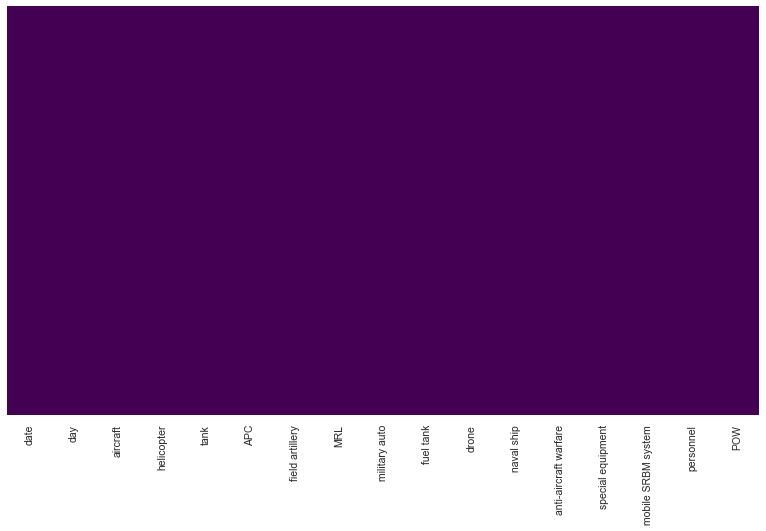

In [253]:
#Heat Map
#Diff type of cmap='viridis', 'plasma', 'inferno', 'magma', 'cividis']

plt.figure(figsize=(12,7))
sns.heatmap(df_new.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:xlabel='day', ylabel='APC'>

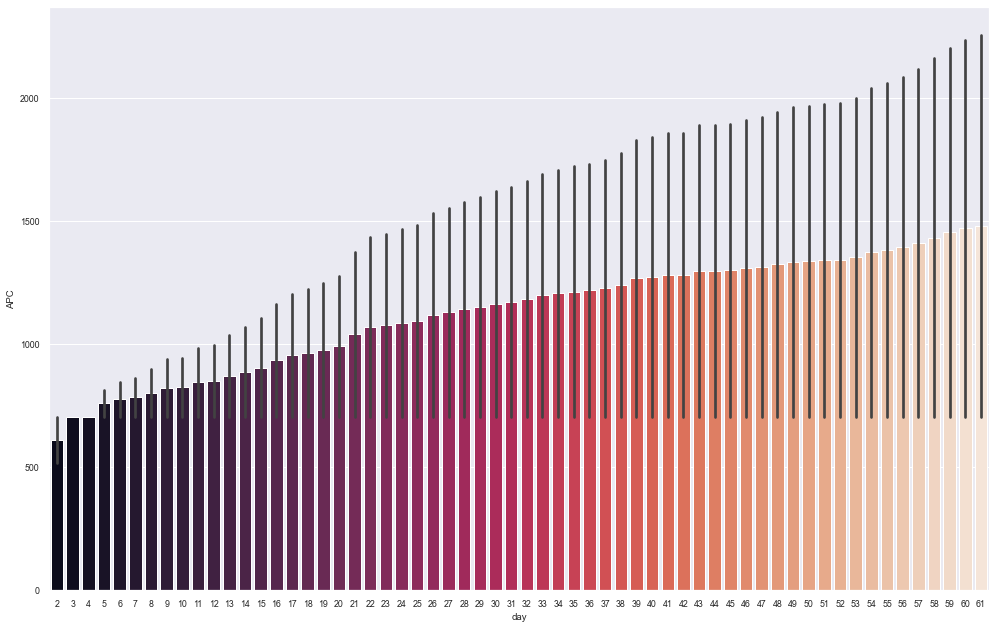

In [254]:
#For giving figure size we have used matplot in seaborn so it will be presentable.
#palette=rocket for giving some attractive color to plot.

plt.rcParams["figure.figsize"]=(15,10)
sns.set(font_scale = 0.80)
sns.barplot(x="day",y="APC",data=df_new,ci=95,dodge=False,palette="rocket")

#Observation:The use of APC equipment is increasing day-by-day.

In [ ]:
plt.rcParams["figure.figsize"]=(15,10)
sns.set(font_scale = 0.90)
sns.barplot(x="day",y="military auto",data=df_new,ci=95,dodge=False,palette="viridis")

#Observation: Military auto are used on higher scale in the war.


<AxesSubplot:xlabel='day', ylabel='tank'>

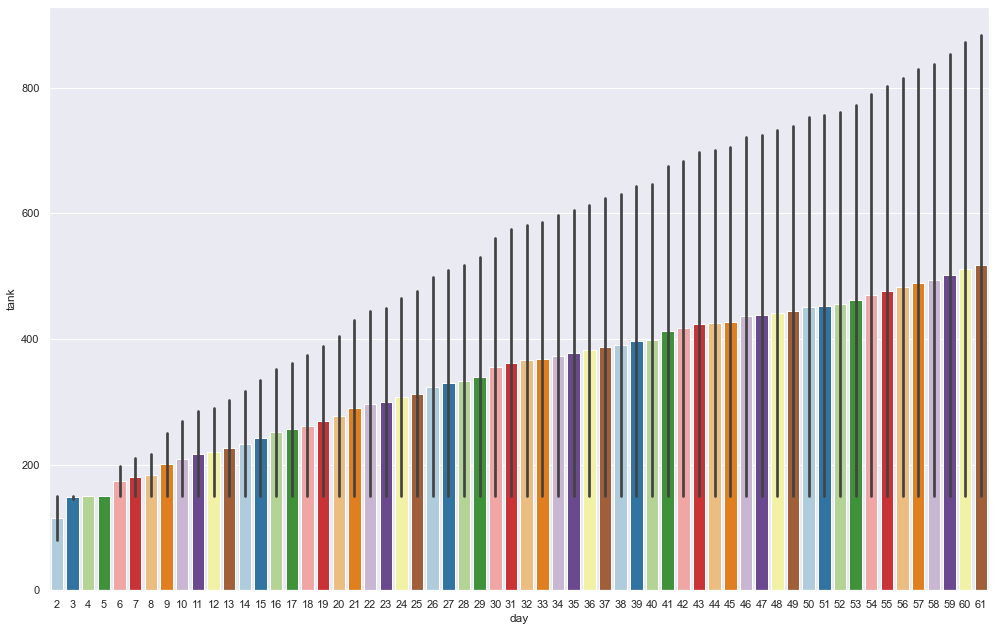

In [255]:
plt.rcParams["figure.figsize"]=(15,10)
sns.set(font_scale = 1)
sns.barplot(x="day",y="tank",data=df_new,ci=95,dodge=False,palette="Paired")

#Observation: On daily basis this equipment are used on large scale.

In [257]:
personnel_values=df_new.personnel.value_counts().values
personnel_labels=df_new.personnel.value_counts().index

([<matplotlib.patches.Wedge at 0x2d39cc2ce20>,
 [Text(-1.0517834049528894, 0.32210505905015907, '12000.0'),
  Text(0.9603155147202899, -0.536464455660862, '11000.0'),
  Text(1.0371651848491195, -0.3664537888150321, '17700.0'),
  Text(1.0753107602951695, -0.23174720881474434, '21600.0'),
  Text(1.0910904775362775, -0.13971961147118195, '19600.0'),
  Text(1.09900886250397, -0.046685331076580044, '18000.0')],
 [Text(-0.5737000390652124, 0.17569366857281402, '90.54%'),
  Text(0.5238084625747035, -0.29261697581501556, '2.70%'),
  Text(0.565726464463156, -0.1998838848081993, '2.70%'),
  Text(0.5865331419791833, -0.12640756844440598, '1.35%'),
  Text(0.5951402604743331, -0.07621069716609923, '1.35%'),
  Text(0.59945937954762, -0.02546472604177093, '1.35%')])

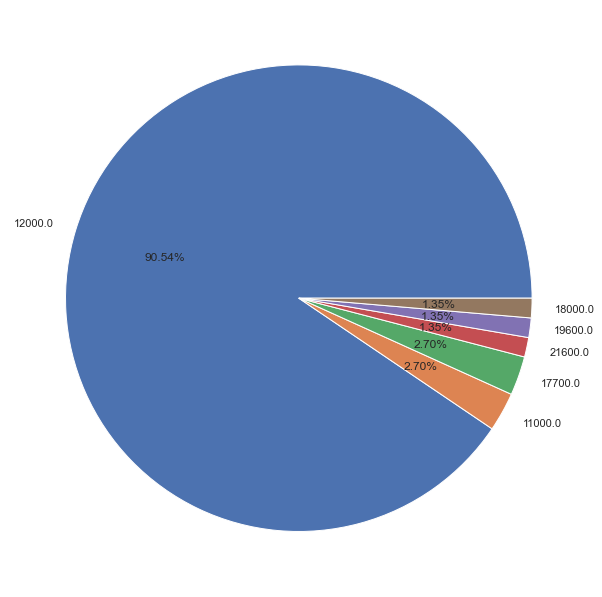

In [258]:
plt.pie(personnel_values[:6],labels=personnel_labels[:6],autopct="%1.2f%%")

#Observation: (08-14)-03-2022 daily 12000 soldiers were losing life which is shown in pie chart.

In [260]:
y = EQ ["day"]

x = HU ["personnel"]

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'aircraft'}>,
        <AxesSubplot:title={'center':'helicopter'}>,
        <AxesSubplot:title={'center':'tank'}>],
       [<AxesSubplot:title={'center':'APC'}>,
        <AxesSubplot:title={'center':'field artillery'}>,
        <AxesSubplot:title={'center':'MRL'}>,
        <AxesSubplot:title={'center':'military auto'}>],
       [<AxesSubplot:title={'center':'fuel tank'}>,
        <AxesSubplot:title={'center':'drone'}>,
        <AxesSubplot:title={'center':'naval ship'}>,
        <AxesSubplot:title={'center':'anti-aircraft warfare'}>],
       [<AxesSubplot:title={'center':'special equipment'}>,
        <AxesSubplot:title={'center':'mobile SRBM system'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'personnel'}>],
       [<AxesSubplot:title={'center':'POW'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 10000x9000 with 0 Axes>

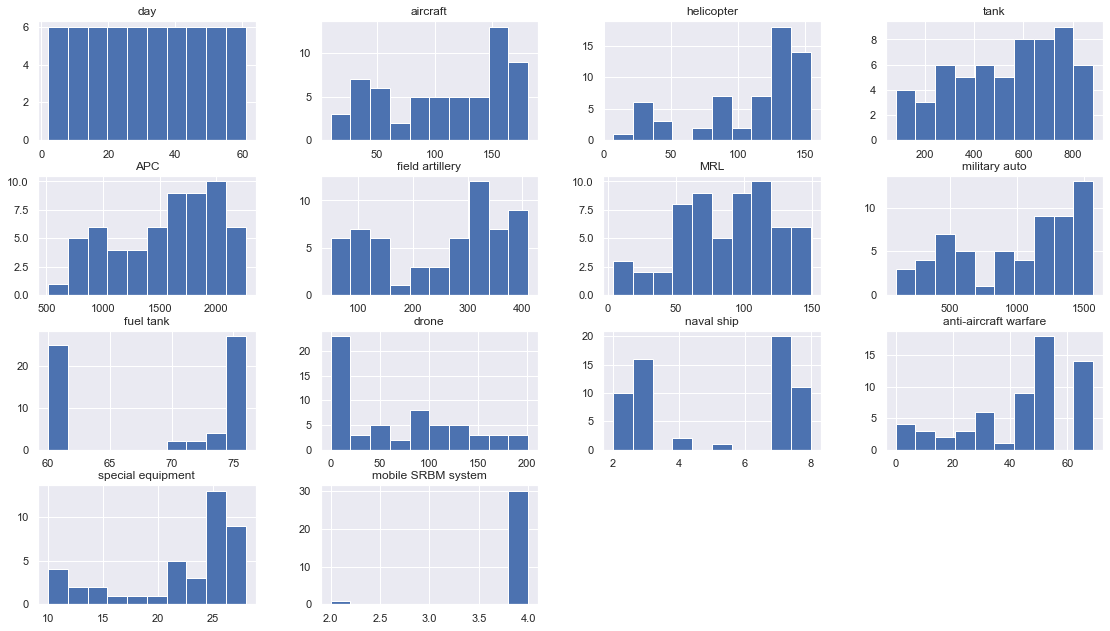

<Figure size 10000x9000 with 0 Axes>

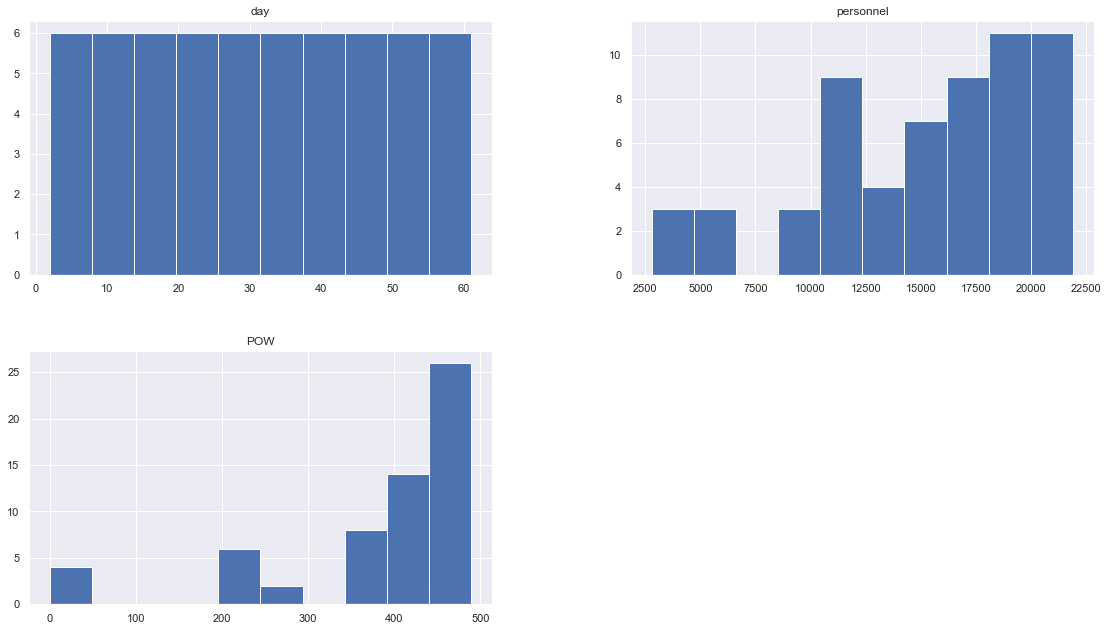

In [261]:
#Histogram of War

plt.rcParams.update({'font.size': 8})
plt.rcParams["figure.figsize"] = (17,10)
fig=plt.figure(figsize=(100,90),dpi=100,facecolor='#77AC30',edgecolor='r')
EQ.hist()


plt.rcParams.update({'font.size': 8})
plt.rcParams["figure.figsize"] = (17,10)
fig=plt.figure(figsize=(100,90),dpi=100,facecolor='#77AC30',edgecolor='r')
HU.hist()


In [262]:
#Correlation
EQ.corr()
HU.corr()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
day,1.000000,0.985697,0.921931,0.992910,0.982761,0.980366,0.980786,0.978187,0.900180,0.969236,0.942125,0.954401,0.915903,0.306186
aircraft,0.985697,1.000000,0.953559,0.993068,0.992385,0.992409,0.971389,0.992905,0.922037,0.930214,0.950957,0.969148,0.971698,0.381843
helicopter,0.921931,0.953559,1.000000,0.955425,0.969348,0.953649,0.942681,0.964552,0.828775,0.808248,0.867188,0.985808,0.926919,0.265213
tank,0.992910,0.993068,0.955425,1.000000,0.996387,0.990217,0.988914,0.992025,0.901390,0.938855,0.939351,0.977437,0.934974,0.286905
APC,0.982761,0.992385,0.969348,0.996387,1.000000,0.991090,0.984967,0.995111,0.893564,0.915785,0.926332,0.983196,0.931610,0.309863
field artillery,0.980366,0.992409,0.953649,0.990217,0.991090,1.000000,0.973177,0.996087,0.932186,0.925959,0.948383,0.970404,0.963720,0.286697
MRL,0.980786,0.971389,0.942681,0.988914,0.984967,0.973177,1.000000,0.976598,0.865433,0.925246,0.917825,0.975983,0.903583,0.258896
military auto,0.978187,0.992905,0.964552,0.992025,0.995111,0.996087,0.976598,1.000000,0.913760,0.910409,0.936829,0.979261,0.964758,0.319475
fuel tank,0.900180,0.922037,0.828775,0.901390,0.893564,0.932186,0.865433,0.913760,1.000000,0.891380,0.956439,0.846371,0.930391,0.460268
drone,0.969236,0.930214,0.808248,0.938855,0.915785,0.925959,0.925246,0.910409,0.891380,1.000000,0.927488,0.859798,0.917374,0.295133


,day,personnel,POW
day,1.000000,0.959554,0.830099
personnel,0.959554,1.000000,0.932227
POW,0.830099,0.932227,1.000000


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='personnel', ylabel='Density'>

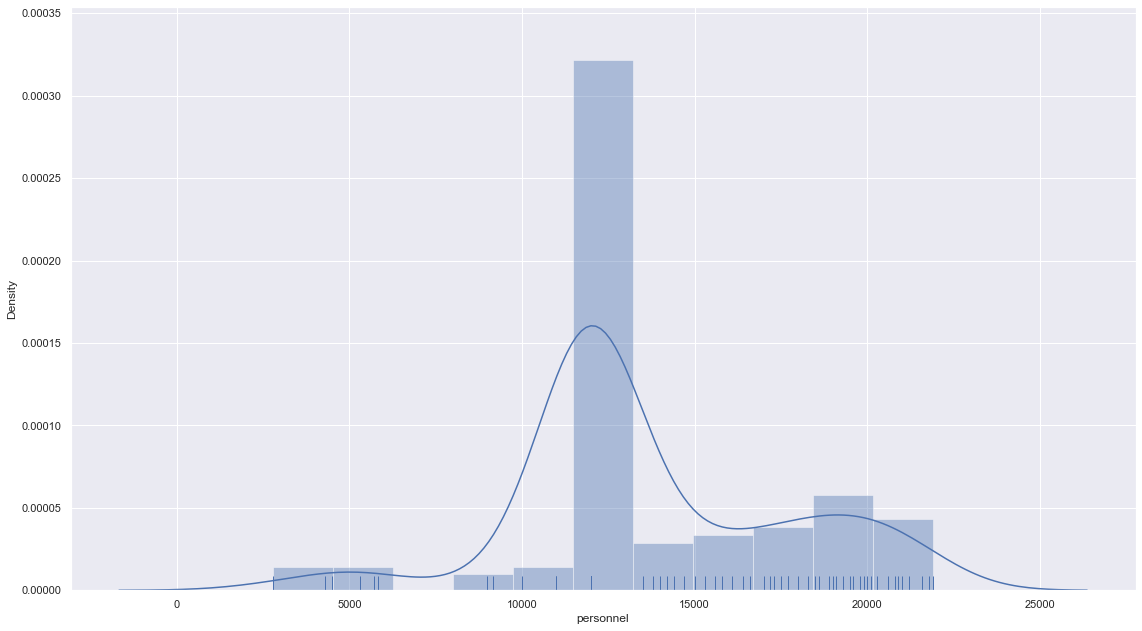

In [263]:
sns.distplot(df_new["personnel"],rug=True,kde=True)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='POW', ylabel='Density'>

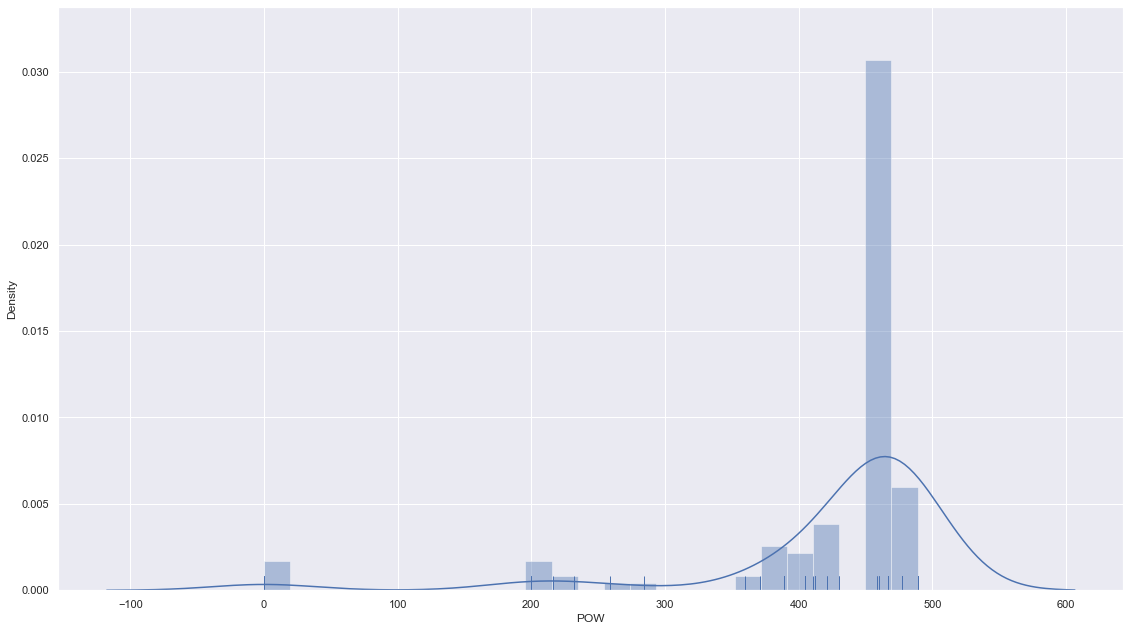

In [265]:
sns.distplot(df_new["POW"],rug=True)

# Observation: If we see the graph the daily death and attacks are increasing on great extend which is not good sign.